In [2]:
# import pandas as pd
# import numpy as np 
# import matplotlib as plt

# drones_3_10= pd.read_excel('drones_3-10.xlsx', sheet_name= 'Sheet1')
# drones_3_10_2 = drones_3_10.replace(to_replace='None', value=np.nan).dropna()
# drones_3_10_2.boxplot(by = 'n_agents', column =['t_solve'], grid = False)


In [1]:
from util import *

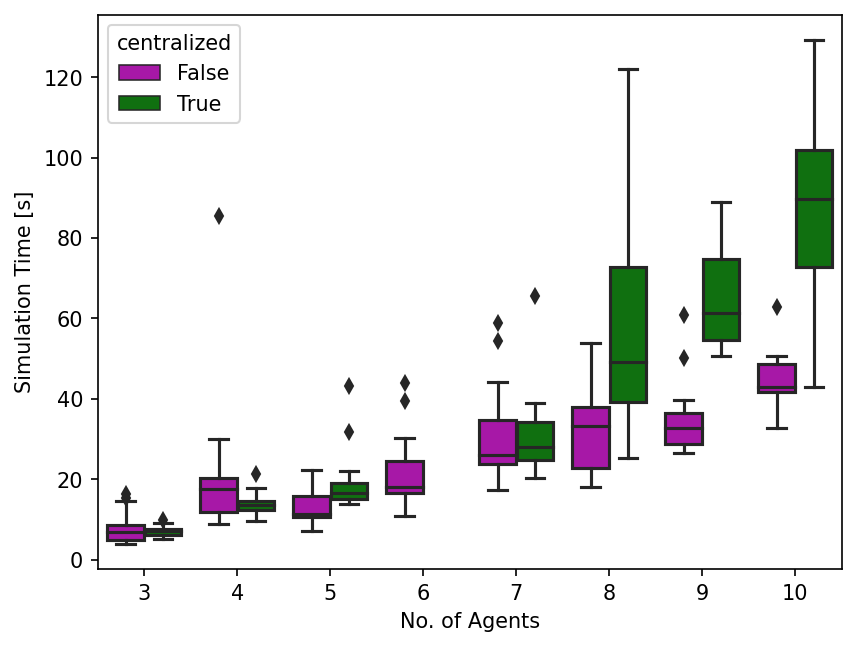

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=150)
drones_3_10_combined= pd.read_excel('drone_centralized_decentralized_combined.xlsx', sheet_name='Sheet1')
drones_3_10_combined_2= drones_3_10_combined.replace(to_replace='None', value=np.nan).dropna()
sns.boxplot(x="n_agents", y="t_solve",hue="centralized", palette=["m", "g"],data=drones_3_10_combined_2)
plt.ylabel('Total Simulation Time [s]');
plt.xlabel('No. of Agents');
plt.savefig('results/monte_carlo_results.png')

In [5]:
drones_3_10_combined.head()

,i_trial,n_agents,t,failed_count,converged,objective_val,N,dt,ids,radius,centralized,t_solve
0,0,3,2.7,0,True,25.280633,10,0.1,"[100, 101, 102]",0.4,False,5.225958
1,1,3,2.3,0,True,28.319865,10,0.1,"[100, 101, 102]",0.4,False,4.240387
2,2,3,3.2,0,True,25.308041,10,0.1,"[100, 101, 102]",0.4,False,7.807388
3,3,3,2.7,0,True,21.483035,10,0.1,"[100, 101, 102]",0.4,False,4.664336
4,4,3,2.7,0,True,33.884175,10,0.1,"[100, 101, 102]",0.4,False,16.256566


In [6]:
df = drones_3_10_combined

In [7]:
df.head()

,i_trial,n_agents,t,failed_count,converged,objective_val,N,dt,ids,radius,centralized,t_solve
0,0,3,2.7,0,True,25.280633,10,0.1,"[100, 101, 102]",0.4,False,5.225958
1,1,3,2.3,0,True,28.319865,10,0.1,"[100, 101, 102]",0.4,False,4.240387
2,2,3,3.2,0,True,25.308041,10,0.1,"[100, 101, 102]",0.4,False,7.807388
3,3,3,2.7,0,True,21.483035,10,0.1,"[100, 101, 102]",0.4,False,4.664336
4,4,3,2.7,0,True,33.884175,10,0.1,"[100, 101, 102]",0.4,False,16.256566


In [8]:
success_count=df.groupby(['centralized'])['converged'].value_counts()

In [9]:
success_count_df = pd.DataFrame(success_count)

In [10]:
success_count_df=success_count_df.rename(columns={'converged':'count'})

In [11]:
success_count_df

count
centralized converged       
False       True         177
            False         63
True        True         143
            False         97

In [12]:
success_count_df['convergence_prob'] = success_count_df['count']/240

In [13]:
final=success_count_df.style

In [14]:
final.set_properties(
    **{'border': '1px black solid !important'}
).set_caption("Convergence Analysis on Multi-Done Simulations").set_table_styles([
    # Selector 1
    {'selector': '',
     'props': [('border', '2px black solid !important')]},
    # Selector 2
    {'selector': 'caption',
     'props': [
         ('color', 'black'),
         ('font-size', '25px'),
         ('text-align', 'center'),
         ('border', '3px black solid !important')]},
    # Selector 3
    {'selector': 'th', 'props': [
        ('font-size', '10pt'),
        ('border-style', 'solid'),
        ('border-width', '1px'),
        ('border-color', 'black')  # Missing Border Color here
    ]}
])

In [27]:
final.export?

Signature: final.export() -> 'dict[str, Any]'
Docstring:
Export the styles applied to the current Styler.

Can be applied to a second Styler with ``Styler.use``.

Returns
-------
styles : dict

See Also
--------
Styler.use: Set the styles on the current Styler.
Styler.copy: Create a copy of the current Styler.

Notes
-----
This method is designed to copy non-data dependent attributes of
one Styler to another. It differs from ``Styler.copy`` where data and
data dependent attributes are also copied.

The following items are exported since they are not generally data dependent:

  - Styling functions added by the ``apply`` and ``applymap``
  - Whether axes and names are hidden from the display, if unambiguous.
  - Table attributes
  - Table styles

The following attributes are considered data dependent and therefore not
exported:

  - Caption
  - UUID
  - Tooltips
  - Any hidden rows or columns identified by Index labels
  - Any formatting applied using ``Styler.format``
  - Any CSS class

In [17]:
html = final.render()

/tmp/ipykernel_608/3332641052.py:1: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = final.render()


In [23]:
!pip install dataframe_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 31.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.0/264.0 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.5 MB/s eta 0:00:00


In [24]:
import dataframe_image as dfi

In [25]:
dfi.export(final, 'statistics_monte_carlo.png')

OSError: Chrome executable not able to be found on your machine